# Gestión Moderna de Portafolio


### Autores: Bernardo León y Carlos Zapata
### Copyright 2022


## Capitulo 2: Modelo MV

### Ejemplos 2.1 y 2.2

In [1]:
#Librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## Caso de 2 activos: ejemplo 2.1

In [2]:
# Información histórica para AAPL y AMZN
fechai = "2009-12-01"
fechaf = "2021-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()
rho = retornos['AAPL'].corr(retornos['AMZN'])
n = len(mu)

[*********************100%***********************]  2 of 2 completed


In [ ]:
# Calculo de los pesos optimos
sigma1 = sigma['AAPL']
sigma2 = sigma['AMZN']
w1 = (sigma2**2 - rho*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho*sigma1*sigma2))
w2 = (sigma1**2 - rho*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho*sigma1*sigma2))

print('w AAPL: ', round(w1,4))
print('w AMZN: ', round(w2,4))

w AAPL:  0.5294
w AMZN:  0.4706


In [ ]:
# Portafolio  optimo
w = np.array([w1,w2])
rp = (w @ mu)*12
sigmap = np.sqrt(w.T @ cov @ w)
sigmap = sigmap*np.sqrt(12)

print('E(Rp): ', round(rp,4))
print('SigmaP: ', round(sigmap,4))

E(Rp):  0.2721
SigmaP:  0.2269


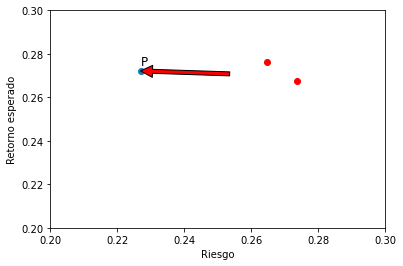

In [ ]:
# Plano Riesgo-Retorno
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sigma*np.sqrt(12), mu*12, "ro")
plt.plot(sigmap, rp, "*",marker = 'o')
plt.ylim(0.2,0.3)
plt.xlim(0.2,0.3)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
ax.text(sigmap, rp*1.01, "P", fontsize=12)
plt.annotate(' ', xy = (sigmap, rp), 
             fontsize = 16, xytext = (sigmap*1.12, rp), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.show()

## Cambios en la correlacion de los activos
## Ejemplo 2.2


In [ ]:
# Calculos con diferentes correlaciones (rho)
rho1 = 0.7 
w11 = (sigma2**2 - rho1*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho1*sigma1*sigma2))
w21 = (sigma1**2 - rho1*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho1*sigma1*sigma2))
sigmap1 = np.sqrt(w11**2 * sigma1**2+ w21**2 * sigma2**2 + 2*w11*w21*sigma1*sigma2*rho1)
round(sigmap1*np.sqrt(12),4)

0.2478

In [ ]:
rho2 = -0.3
w12 = (sigma2**2 - rho2*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho2*sigma1*sigma2))
w22 = (sigma1**2 - rho2*sigma1*sigma2)/(sigma1**2+sigma2**2 - 2*(rho2*sigma1*sigma2))
sigmap1 = np.sqrt(w12**2 * sigma1**2+ w22**2 * sigma2**2 + 2*w12*w22*sigma1*sigma2*rho2)
round(sigmap1*np.sqrt(12),4)

0.1592


## Caso de n activos
## Ejemplos 2.3, 2.4 y 2.5

In [3]:
# Información histórica para las acciones: AAPL, AMZN, GOOG y MSFT
fechai = "2009-12-01"
fechaf = "2021-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN","GOOGL","MSFT"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()*12
cov = retornos.cov()*12
var = np.diag(cov)
sigma = np.sqrt(var)
n = len(mu)
round(mu,4)

[*********************100%***********************]  4 of 4 completed


AAPL     0.2762
AMZN     0.2675
GOOGL    0.1862
MSFT     0.2216
dtype: float64

In [4]:
## Portafolio Optimo de Markowitz
unos = np.repeat(1,n)
x = mu.T @ np.linalg.inv(cov) @ mu
y = mu.T @ np.linalg.inv(cov) @ unos
z = unos.T @ np.linalg.inv(cov) @ unos
d = x*z - y**2

g = (x*np.linalg.solve(cov,unos) - y*np.linalg.solve(cov,mu)) * (1/d)
h = (z*np.linalg.solve(cov,mu) -  y*np.linalg.solve(cov,unos))  * (1/d)

In [5]:
# Calculos para un solo portafolio con retorno Rp=0.25
rpobj = 0.25
wpobj = g + h * rpobj 
print('w PMVG: ', wpobj)

w PMVG:  [0.32359641 0.25422561 0.02707723 0.39510075]


In [6]:
# Riesgo del portafolio óptimo
sigmapobj = np.sqrt(wpobj.T @ cov @ wpobj)
round(sigmapobj,4)

0.1936

In [7]:
# Construcción de la FE
rpmin = mu.min()
rpmax = mu.max()
nport = 100

j = np.linspace(rpmin,rpmax, nport) 
wpo = np.zeros((nport, n))
rpo = np.zeros((nport,1))
sigmapo = np.zeros((nport,1))

for i in range(nport):
    wj = g + h*j[i] 
    wpo[i,:] = wj.T
    rpo[i] = wj @ mu
    sigmapo[i] = np.sqrt( wj.T @ cov @ wj)

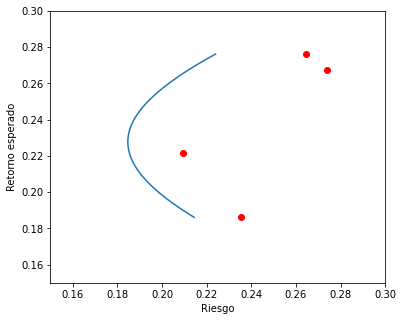

In [8]:
# Plano Riesgo-Retorno
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(sigma, mu, "ro")
plt.plot(sigmapo, rpo)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
plt.ylim(0.15,0.3)
plt.xlim(0.15,0.3)
plt.show()

In [22]:
# PMVG
cov_inv_1 = np.linalg.solve(cov,unos) 
wpmvg = (1/(unos @ cov_inv_1)) * cov_inv_1
rpmvg = wpmvg @ mu
sigmapmvg = np.sqrt( wpmvg.T @ cov @ wpmvg)

print('Resultados PMVG: ')
print('E(Rp): ', round(rpmvg,4))
print('SigmaP: ', round(sigmapmvg,4))

Resultados PMVG: 
E(Rp):  0.2278
SigmaP:  0.1847


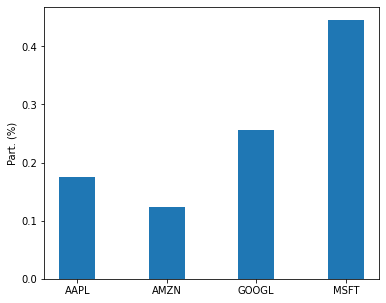

In [10]:
# Pesos del PMVG
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

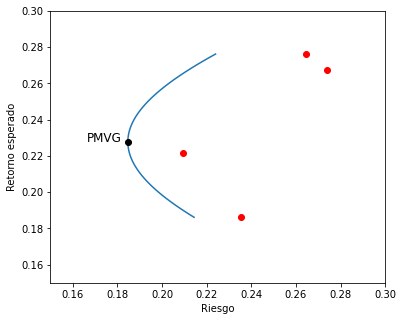

In [11]:
# Plano Riesgo-Retorno
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(sigma, mu, "ro")
plt.plot(sigmapo, rpo)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
plt.ylim(0.15,0.3)
plt.xlim(0.15,0.3)
plt.plot(sigmapmvg, rpmvg, "o", color = 'black')
ax.text(sigmapmvg*0.9, rpmvg, "PMVG", fontsize=12)
plt.show()

## Ejemplo 2.6
## Solucion del portafolio tangente: maximo Sharpe

In [12]:
# Formulacion 1
rf = 0.0
r = mu -rf 
Z = np.linalg.solve(cov,r) 
sumaZ = Z.sum()
wpt = Z/sumaZ
rpt = wpt @ mu
sigmapt = np.sqrt(wpt.T @ cov @ wpt)

print('Resultados PT: ')
print('E(Rp): ', round(rpt,4))
print('SigmaP: ', round(sigmapt,4))

Resultados PT: 
E(Rp):  0.2497
SigmaP:  0.1934


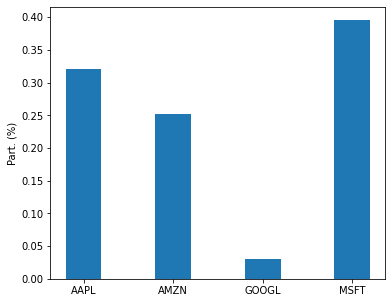

In [13]:
# Pesos del PT
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpt, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

In [14]:
# Construcción de la LMC
nport = 100
wpc = np.linspace(0, 1.5, nport) 
rpc = np.zeros((nport))
sigmapc = np.zeros((nport))

for i in range(nport):
    rpc[i] = wpc[i]*rpt+(1-wpc[i])*rf
    sigmapc[i] = wpc[i]*sigmapt

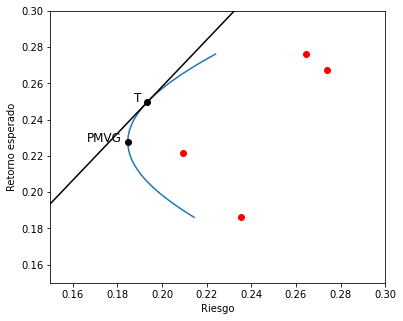

In [15]:
# Plano Riesgo-Retorno
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(sigma, mu, "ro")
plt.plot(sigmapo, rpo)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
plt.ylim(0.15,0.3)
plt.xlim(0.15,0.3)
plt.plot(sigmapmvg, rpmvg, "o", color = 'black')
ax.text(sigmapmvg*0.9, rpmvg, "PMVG", fontsize=12)
plt.plot(sigmapc, rpc, color = 'black')
plt.plot(sigmapt, rpt, "o", color = 'black')
ax.text(sigmapt*0.97, rpt, "T", fontsize=12)
plt.show()


## Ejemplo 2.7
## Solucion PMVG y PT sin cortos

In [41]:
# Función para el PMVG
def pmvg(cov, ones):  
    covis = np.linalg.inv(cov)  
    w = np.dot(covis, ones)  
    return w / np.sum(np.abs(w)) 

In [ ]:
# Función para el PT
def max_sharpe(cov, returns):  
    covis = np.linalg.inv(cov)  
    w = np.dot(covis, returns)  
    return w / np.sum(np.abs(w))  

In [16]:
# Implementación usando CVX
import cvxpy as cp

In [23]:
# PMVG
n = len(mu)
w = cp.Variable(n)
risk = cp.quad_form(w, cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w) == 1, w >= 0]
prob = cp.Problem(objective, constraints)
prob.solve()
wpmvg = pd.DataFrame(w.value)
round(wpmvg,4)

,0
0,0.1750
1,0.1236
2,0.2559
3,0.4455


In [37]:
# PT de Sharpe
n = len(mu)
w = cp.Variable(n)
risk = cp.quad_form(w, cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w) == 1, w >= 0] 
prob = cp.Problem(objective, constraints)
prob.solve()
wpt2 = pd.DataFrame(w.value)
round(wpt2,4)

,0
0,0.1750
1,0.1236
2,0.2559
3,0.4455


## Implementacion del algoritmo: Seccion 2.9

In [ ]:
# Información histórica para las acciones
fechai = "2009-12-01"
fechaf = "2021-12-31"
periodicidad = "1Mo"
activos = ["AAPL","ABT","AMZN","CAT","CSX","CSCO","GOOG","HD","JNJ","MSFT","MCD","V"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()*12
cov = retornos.cov()*12
var = np.diag(cov)
sigma = np.sqrt(var)
n = len(mu)

[*********************100%***********************]  12 of 12 completed


In [ ]:
# Construcción de la FE
unos = np.repeat(1,n)
x = mu.T @ np.linalg.inv(cov) @ mu
y = mu.T @ np.linalg.inv(cov) @ unos
z = unos.T @ np.linalg.inv(cov) @ unos
d = x*z - y**2

g = (x*np.linalg.solve(cov,unos) - y*np.linalg.solve(cov,mu)) * (1/d)
h = (z*np.linalg.solve(cov,mu) -  y*np.linalg.solve(cov,unos))  * (1/d)

rpmin = mu.min()
rpmax = mu.max()
nport = 100

j = np.linspace(rpmin,rpmax, nport) 
wpo = np.zeros((nport, n))
rpo = np.zeros((nport,1))
sigmapo = np.zeros((nport,1))

for i in range(nport):
    wj = g + h*j[i] 
    wpo[i,:] = wj.T
    rpo[i] = wj @ mu
    sigmapo[i] = np.sqrt( wj.T @ cov @ wj)

# PMVG
cov_inv_1 = np.linalg.solve(cov,unos) 
wpmvg = (1/(unos @ cov_inv_1)) * cov_inv_1
rpmvg = wpmvg @ mu
sigmapmvg = np.sqrt( wpmvg.T @ cov @ wpmvg)

# PT
rf = 0.0
r = mu -rf 
Z = np.linalg.solve(cov,r) 
sumaZ = Z.sum()
wpt = Z/sumaZ
rpt = wpt @ mu
sigmapt = np.sqrt(wpt.T @ cov @ wpt)


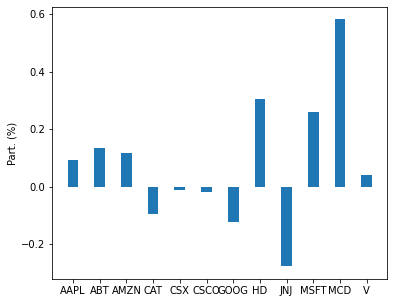

In [ ]:
# Pesos del PT
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpt, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

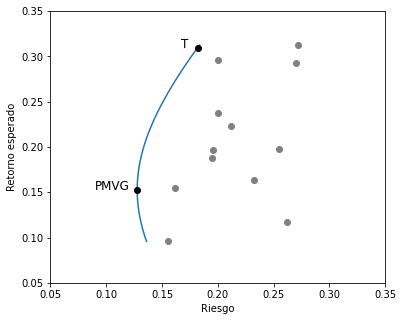

In [ ]:
# Plano Riesgo-Retorno
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(sigma, mu, "o", color = 'gray')
plt.plot(sigmapo, rpo)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
plt.ylim(0.05,0.35)
plt.xlim(0.05,0.35)
plt.plot(sigmapmvg, rpmvg, "o", color = 'black')
ax.text(sigmapmvg*0.7, rpmvg, "PMVG", fontsize=12)
plt.plot(sigmapt, rpt, "o", color = 'black')
ax.text(sigmapt*0.92, rpt, "T", fontsize=12)
plt.show()
